In [19]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train_df = pd.read_csv('train_fe1.csv')
test_df = pd.read_csv('test_fe1.csv')

train_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,BsmtFlag,WoodDeckFlag,PoolFlag,BsmtFinPerc,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,4.189655,9.042040,7,5,2003,5.283204,4.0,3.0,4.0,3.0,1.0,6.0,1.0,6.753438,5.0,0.0,7.444833,1.0,0.0,2,1,3,1,4.0,8,7.0,0,0.0,2.0,2.0,3.0,2.0,0.000000,4.127134,0.000000,0.0,0.0,0,1.0,0,0,0.824766,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.247694
1,2,4.394449,9.169623,6,8,1976,0.000000,3.0,3.0,4.0,3.0,4.0,5.0,1.0,7.141245,5.0,0.0,7.141245,0.0,1.0,2,0,3,1,3.0,6,7.0,1,3.0,2.0,2.0,3.0,2.0,5.700444,0.000000,0.000000,0.0,0.0,0,1.0,1,0,0.774960,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.109011
2,3,4.234107,9.328212,7,5,2002,5.093750,4.0,3.0,4.0,3.0,2.0,6.0,1.0,6.825460,5.0,0.0,7.488294,1.0,0.0,2,1,3,1,4.0,6,7.0,1,3.0,2.0,2.0,3.0,2.0,0.000000,3.761200,0.000000,0.0,0.0,0,1.0,0,0,0.528261,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.317167
3,4,4.110874,9.164401,7,5,1970,0.000000,3.0,3.0,3.0,4.0,1.0,5.0,1.0,6.629363,4.0,0.0,7.448916,1.0,0.0,1,0,3,1,4.0,7,7.0,1,4.0,1.0,3.0,3.0,2.0,0.000000,3.583519,5.609472,0.0,0.0,0,1.0,0,0,0.285714,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11.849398
4,5,4.442651,9.565284,8,5,2000,5.860786,4.0,3.0,4.0,3.0,3.0,6.0,1.0,7.044033,5.0,0.0,7.695758,1.0,0.0,2,1,4,1,4.0,9,7.0,1,3.0,2.0,3.0,3.0,2.0,5.262690,4.442651,0.000000,0.0,0.0,0,1.0,1,0,0.572052,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.429216


In [8]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [9]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [10]:
del train_df, test_df

In [11]:
print(X_train.shape)
print(X_test.shape)

(1460, 212)
(1459, 212)


## Train Valildation Split

In [28]:
# Save the 'MiscVal' column
X_test_MiscVal = X_test['MiscVal']

# Now drop the 'MiscVal' column since we won't use it to train our model.
X_train.drop("MiscVal", axis = 1, inplace = True)
X_test.drop("MiscVal", axis = 1, inplace = True)

In [179]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [92]:
len(X_train_train)/len(X_val)

4.0

## Ridge Regression

In [93]:
from sklearn import linear_model

Automatically created module for IPython interactive environment


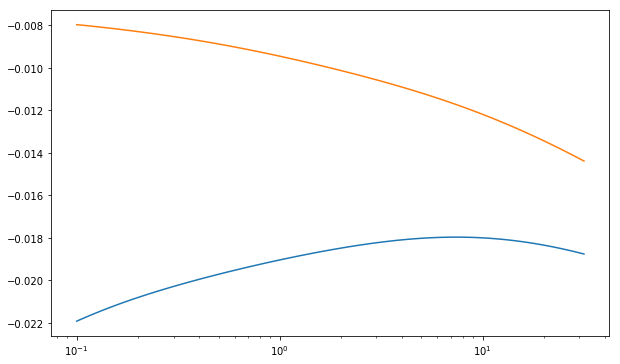

In [94]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-1, 1.5, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [96]:
param_range[np.argmax(test_scores_mean)]

7.3907220335257788

In [97]:
rm_best = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])

In [98]:
rm_best.fit(X_train_train, y_train_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [99]:
pred_val = rm_best.predict(X_val)

In [100]:
np.sqrt(np.mean((pred_val - y_val)**2))

0.12066372262433288

In [102]:
rm_best.fit(X_train, y_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [103]:
pred_test = rm_best.predict(X_test)

In [114]:
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test) + X_test_MiscVal})

In [117]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [119]:
pred_test_final.to_csv('rr2_yq.csv',index=False)

## Lasso Regression

Automatically created module for IPython interactive environment


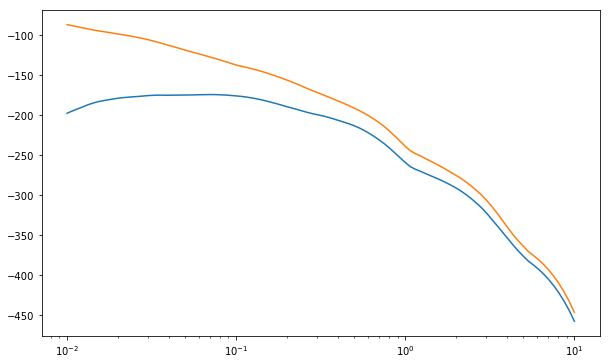

In [202]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train*100

param_range = np.logspace(-2, 1, 100)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [203]:
param_range[np.argmax(test_scores_mean)]

0.070548023107186456

In [204]:
lm_best = linear_model.Lasso(alpha = param_range[np.argmax(test_scores_mean)])

In [205]:
lm_best.fit(X_train_train, y_train_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
lm_best.coef_

array([  0.        ,   7.25981945,   5.89187671,   3.10544471,
         0.08415836,   0.        ,   1.46960993,  -0.79141202,
         1.66112864,  -0.10870268,   2.03562812,   0.58874111,
        -0.        ,   0.        ,   1.30602108,  -1.14459216,
        38.7166892 ,   2.44599004,   0.        ,   3.27038544,
         2.2857907 ,  -0.26882933,  -2.29602547,   2.67639862,
         0.75501239,   3.30064008,   0.82967404,   0.71724474,
         0.32585818,   5.33937398,  -0.        ,   1.96368176,
         0.20202346,   0.1785686 ,  -0.05927298,   0.56401273,
         0.9732695 ,  -0.        ,  -0.        ,  -0.        ,
         6.06708175,   0.        ,  -2.32833665,  -0.        ,
        -0.        ,   3.30500697,  -0.84056209,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         4.27866729,   0.        ,   2.56103925,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [207]:
pred_val = lm_best.predict(X_val)

In [208]:
np.sqrt(np.mean((pred_val/100 - y_val)**2))

0.12075029845852028

In [209]:
lm_best.fit(X_train, y_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
pred_test = lm_best.predict(X_test)

In [189]:
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test/100) + X_test_MiscVal})

In [190]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [191]:
pred_test_final.to_csv('lr1_yq.csv',index=False)

## Random Forest